In [1]:
try:
    from PIL import Image
except ImportError:
    import Image
import matplotlib.pyplot as plt

import subprocess
import imutils
import shutil
import cv2
import os

In [2]:
from spotter_ocr import MaskTextSpotterWrapper
text_spotter = MaskTextSpotterWrapper('../MaskTextSpotter/configs/finetune.yaml')

In [3]:
labels = {
    0: 'label',
    1: 'price',
    2: 'cop',
    3: 'name',
    4: 'barcode'
}

labels_to_show = {
    0: 'label',
    1: 'price',
    2: 'cop',
    3: 'name',
#     4: 'barcode'
}

In [4]:
images_gen = iter(os.listdir('images/'))

In [9]:
image_name = next(images_gen)

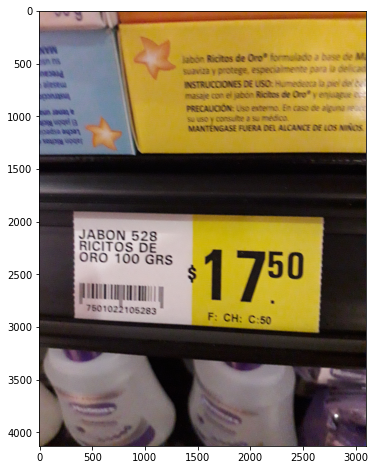

In [10]:
img = cv2.imread('images/' + image_name)
plt.figure(figsize=(16,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
try:
    shutil.rmtree('runs/detect/')
except OSError as e:
    print ("Error: %s - %s." % (e.filename, e.strerror))

process = subprocess.run(['python3', 'detect.py', 
                          '--weights', 'weights/best.pt', 
                          '--img', '1024',
                          '--conf', '0.45',
                          '--source', 'images/' + image_name,
                          '--save-txt'],
                                        check=False,
                                        capture_output=True,  
                                        universal_newlines=True)
print(process.stderr)
print(process.stdout)

YOLOv5 v4.0-115-ge931b9d torch 1.7.1+cu110 CUDA:0 (GeForce RTX 2070, 7982.3125MB)

Model Summary: 224 layers, 7064698 parameters, 0 gradients, 16.4 GFLOPS

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.45, device='', exist_ok=False, img_size=1024, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='images/20201109_191348.jpg', update=False, view_img=False, weights=['weights/best.pt'])
Fusing layers... 
image 1/1 /home/ihor/Projects/label_detect_ocr/yolov5/images/20201109_191348.jpg: 1024x768 1 label, 1 price, 1 cop, 1 name, 1 barcode, Done. (0.017s)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels
Done. (0.434s)



### Spotter OCR

______
cop
Empty
______
______
price
Empty
______
______
label
['grs', 'oro', '50', '528', 'de', 'jabon', '105283', 'rooiuee105283', 'ricitos', '100']
______
______
name
['jason', 'ficitos']
______


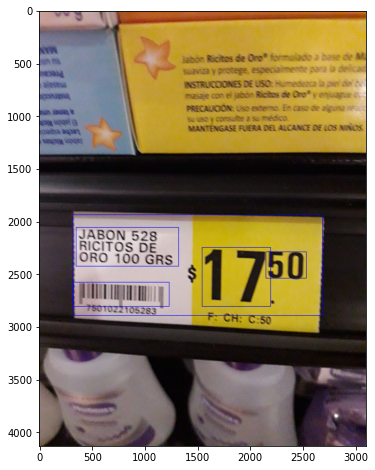

CPU times: user 2.59 s, sys: 150 ms, total: 2.74 s
Wall time: 2.24 s


In [12]:
%%time
img = cv2.imread('images/' + image_name)
dh, dw, _ = img.shape

fl = open("runs/detect/exp/labels/" + os.path.splitext(image_name)[0] + '.txt', 'r')
data = fl.readlines()
fl.close()

for dt in data:

    l, x, y, w, h = map(float, dt.split(' '))

    x1 = int((x - w / 2) * dw)
    x2 = int((x + w / 2) * dw)
    y1 = int((y - h / 2) * dh)
    y2 = int((y + h / 2) * dh)
    
    field = labels.get(int(l))
    if labels_to_show.get(int(l)):
        
        crop_img = img[y1:y2, x1:x2]
        print("______")
        print(field)
        try:
            result = text_spotter.recognize(crop_img)
            print(result)
            print("______")
        except Exception as ex:
            print('Empty')
            print("______")
        
    if x1 < 0:
        x1 = 0
    if x2 > dw - 1:
        x2 = dw - 1
    if y1 < 0:
        y1 = 0
    if y2 > dh - 1:
        y2 = dh - 1

    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3)
    
plt.figure(figsize=(16,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

/home/ihor/Projects/label_detect_ocr/MaskTextSpotter/maskrcnn_benchmark/structures/boxlist_ops.py:46: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  (ws >= min_size) & (hs >= min_size)


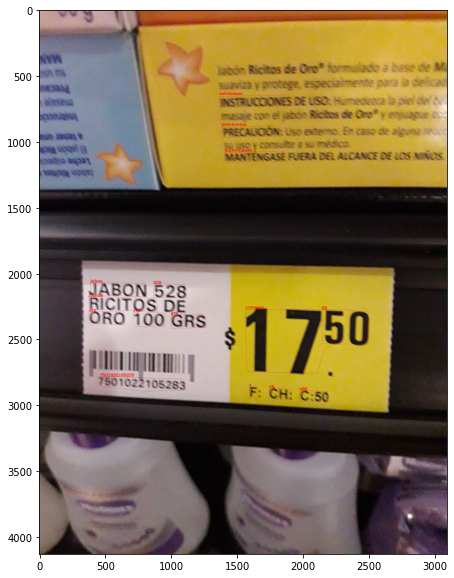

In [11]:
image, _ = text_spotter.detect_and_recognize(img)
plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()